## IMPORTING THE REQUIRED LIBRARIES

In [12]:
import torch
import numpy as np

## IMPORTING THE DATASET AND LOADING THE DATA LOADERS

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

num_workers=0
batch_size=20

transform=transforms.ToTensor()
train_data=datasets.MNIST(root='data',train=True,download=True,transform=transform)
test_data=datasets.MNIST(root='data',train=False,download=True,transform=transform)

train_loader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,num_workers=num_workers)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=batch_size,num_workers=num_workers)

##  VISUALISING A BATCH OF THE TRAINING DATA

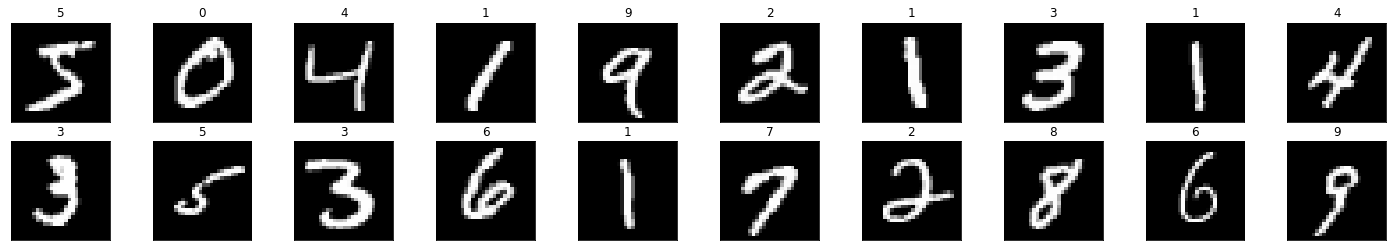

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter=iter(train_loader)
images,labels=dataiter.next()
images=images.numpy()

fig=plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax=fig.add_subplot(2,20/2,idx+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(images[idx]),cmap='gray')
    ax.set_title(str(labels[idx].item()))

## VISUALISING AN IMAGE WITH MORE DETAILS

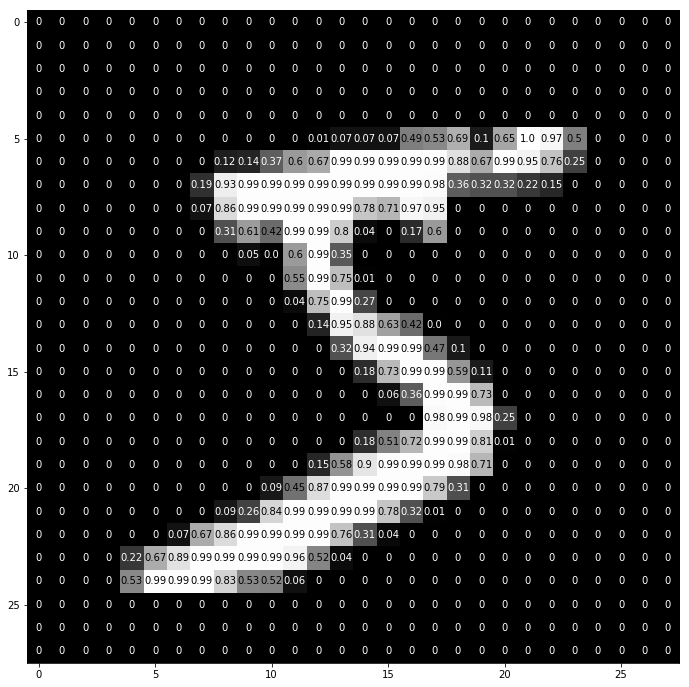

In [4]:
img=np.squeeze(images[0])

fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
ax.imshow(img,cmap='gray')
width,height=img.shape
thresh=img.max()/2.5
for x in range(width):
    for y in range(height):
        val=round(img[x][y],2) if img[x][y]!=0 else 0
        ax.annotate(str(val),xy=(y,x),horizontalalignment='center',verticalalignment='center',color='white' if img[x][y]<thresh else 'black')

## DEFINING THE NETWORK ARCHITECTURE

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        hidden_1=512
        hidden_2=512
        self.fc1=nn.Linear(28*28,hidden_1)
        self.fc2=nn.Linear(hidden_1,hidden_2)
        self.fc3=nn.Linear(hidden_2,10)
        self.dropout=nn.Dropout(0.2)
    def forward(self,x):
        x=x.view(-1,28*28)
        x=F.relu(self.fc1(x))
        x=self.dropout(x)
        x=F.relu(self.fc2(x))
        x=self.dropout(x)
        x=F.relu(self.fc3(x))
        return x
    
model=Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


In [6]:
criterion=torch.nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

## TRAINING THE NETWORK

In [7]:
n_epochs=30

model.train()

for epoch in range(n_epochs):
    train_loss=0.0
    
    for data,target in train_loader:
        optimizer.zero_grad()
        output=model(data)
        loss=criterion(output,target)
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()*data.size(0)
    
    train_loss=train_loss/len(train_loader.dataset)
    print("Epoch-->",epoch,"    ","Training Loss-->",train_loss)

Epoch--> 0      Training Loss--> 0.9578159690381338
Epoch--> 1      Training Loss--> 0.32889589023559046
Epoch--> 2      Training Loss--> 0.25395803162820324
Epoch--> 3      Training Loss--> 0.2073233112671878
Epoch--> 4      Training Loss--> 0.17416788901148053
Epoch--> 5      Training Loss--> 0.14948888642236124
Epoch--> 6      Training Loss--> 0.13118604264012537
Epoch--> 7      Training Loss--> 0.11751337282704966
Epoch--> 8      Training Loss--> 0.1055302875501026
Epoch--> 9      Training Loss--> 0.09496810770168668
Epoch--> 10      Training Loss--> 0.08647851850977167
Epoch--> 11      Training Loss--> 0.07964419860738174
Epoch--> 12      Training Loss--> 0.07427781603534822
Epoch--> 13      Training Loss--> 0.0691520475440775
Epoch--> 14      Training Loss--> 0.06394437324480774
Epoch--> 15      Training Loss--> 0.05888273074200454
Epoch--> 16      Training Loss--> 0.05547379796783207
Epoch--> 17      Training Loss--> 0.05150279916899066
Epoch--> 18      Training Loss--> 0.048458

## TESTING THE TRAINED NETWORK

In [9]:
test_loss=0.0

class_correct=list(0. for i in range(10))
class_total=list(0. for i in range(10))

model.eval()

for data,target in test_loader:
    output=model(data)
    loss=criterion(output,target)
    test_loss+=loss.item()*data.size(0)
    _,pred=torch.max(output,1)
    correct=np.squeeze(pred.eq(target.data.view_as(pred)))
    for i in range(batch_size):
        label=target.data[i]
        class_correct[label]+=correct[i].item()
        class_total[label]+=1
        

test_loss=test_loss/len(test_loader.dataset)
print('Test loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i]>0:
        print('Test accuracy of %5s: %2d%%(%2d/%2d)'%(str(i),100*class_correct[i]/class_total[i],np.sum(class_correct[i]),np.sum(class_total[i])))
    else:
        print('Test accuracy of %5s:N/A(no training examples)'%(str(i)))
        
print('Test Accuracy (Overall): %2d%%(%2d/%2d)'%(100.*np.sum(class_correct)/np.sum(class_total),np.sum(class_correct),np.sum(class_total)))
        

Test loss: 0.056141

Test accuracy of     0: 99%(972/980)
Test accuracy of     1: 99%(1127/1135)
Test accuracy of     2: 98%(1013/1032)
Test accuracy of     3: 98%(992/1010)
Test accuracy of     4: 98%(967/982)
Test accuracy of     5: 98%(876/892)
Test accuracy of     6: 98%(944/958)
Test accuracy of     7: 97%(1003/1028)
Test accuracy of     8: 97%(946/974)
Test accuracy of     9: 97%(988/1009)
Test Accuracy (Overall): 98%(9828/10000)


## VISUALISING SAMPLE TEST RESULTS WITH THEIR LABELS

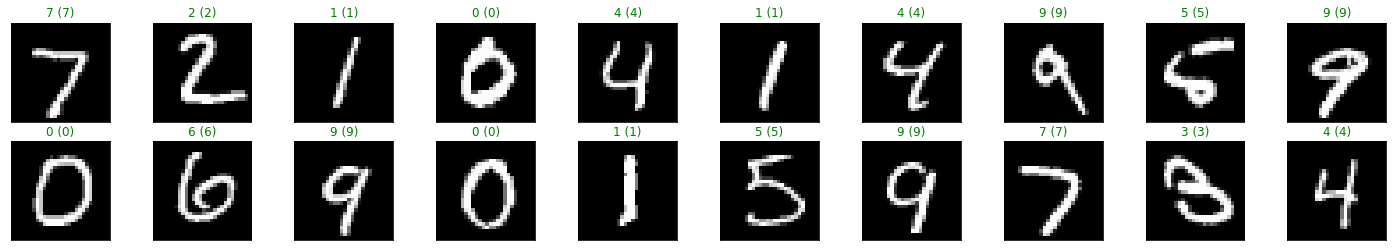

In [11]:
dataiter=iter(test_loader)
images,labels=dataiter.next()

output=model(images)
_,pred=torch.max(output,1)
images=images.numpy()
fig=plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax=fig.add_subplot(2,20/2,idx+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(images[idx]),cmap='gray')
    ax.set_title("{} ({})".format(str(pred[idx].item()),str(labels[idx].item())),color=("green" if pred[idx]==labels[idx] else "red"))